  productAsin country        date  isVerified  ratingScore  \
0  B09G9BL5CP   India  11-08-2024        True            4   
1  B09G9BL5CP   India  16-08-2024        True            5   
2  B09G9BL5CP   India  14-05-2024        True            4   
3  B09G9BL5CP   India  24-06-2024        True            5   
4  B09G9BL5CP   India  18-05-2024        True            5   

               reviewTitle                                  reviewDescription  \
0               No charger  Every thing is good about iPhones, there's not...   
1          iPhone 13 256GB  It look so fabulous, I am android user switche...   
2  Flip camera option nill  I tried to flip camera while recording but no ...   
3                  Product                                       100% genuine   
4             Good product         Happy to get the iPhone 13 in Amazon offer   

                                           reviewUrl  \
0  https://www.amazon.in/gp/customer-reviews/R345...   
1  https://www.amazon.in/gp/

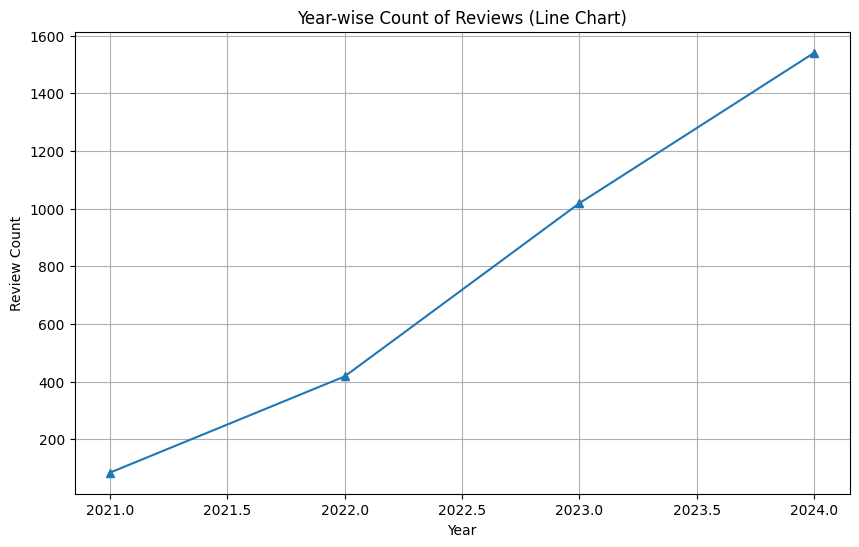

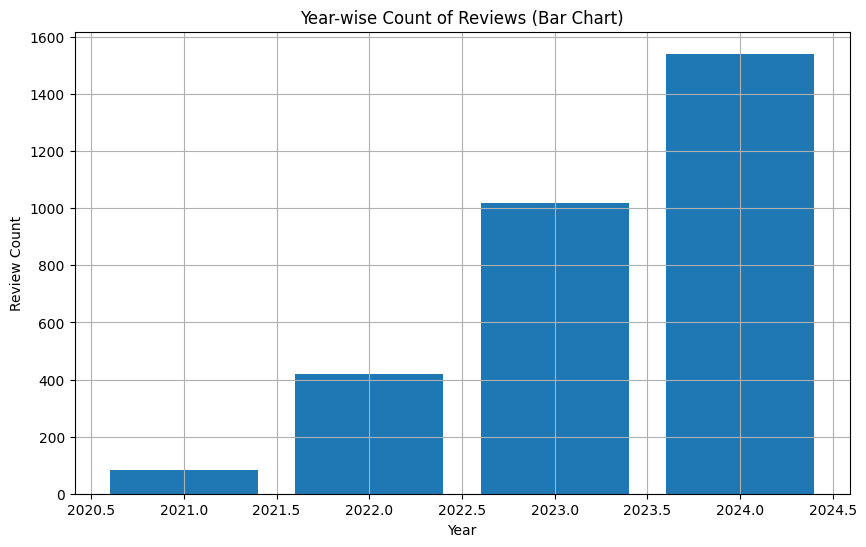

7
86
['Colour: MidnightSize: 256 GB' 'Colour: PinkSize: 256 GB'
 'Colour: BlueSize: 256 GB' 'Colour: GreenSize: 256 GB'
 'Colour: PinkSize: 128 GB' 'Colour: StarlightSize: 256 GB'
 'Colour: GreenSize: 128 GB' 'Colour: StarlightSize: 128 GB'
 'Colour: MidnightSize: 128 GB' 'Colour: (PRODUCT) REDSize: 128 GB'
 'Colour: BlueSize: 128 GB' 'Colour: (PRODUCT) REDSize: 256 GB'
 'Size: 256GBColor: (Product) RED' 'Size: 256GBColor: Pink'
 'Size: 256GBColor: Midnight' 'Size: 128GBColor: Pink'
 'Size: 128GBColor: blue' 'Size: 128GBColor: starlight'
 'Size: 128GBColor: Midnight' 'Size: 128GBColor: green'
 'Size: 128GBColor: (Product) RED' 'Size: 256GBColor: starlight'
 'Size: 256GBColor: blue' 'Size: 512GBColor: starlight'
 'Size: 512GBColor: (Product) RED' 'Size: 512 GBColour: Midnight'
 'Size: 128 GBColour: Blue' 'Size: 128 GBColour: Red'
 'Size: 256 GBColour: Red' 'Size: 512 GBColour: Red'
 'Size: 512 GBColour: Pink' 'Size: 512 GBColour: Blue'
 'Size: 256 GBColour: Midnight' 'Colour: YellowSize

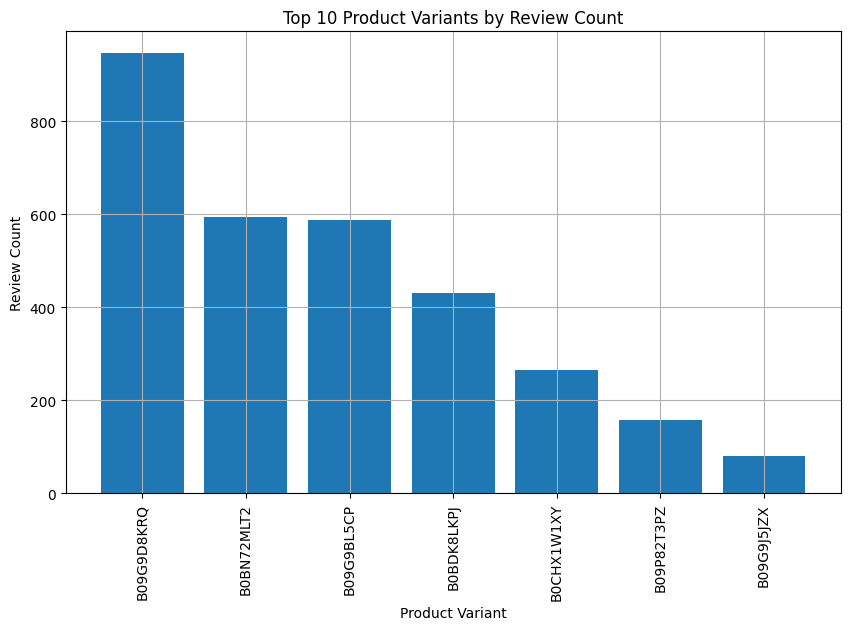

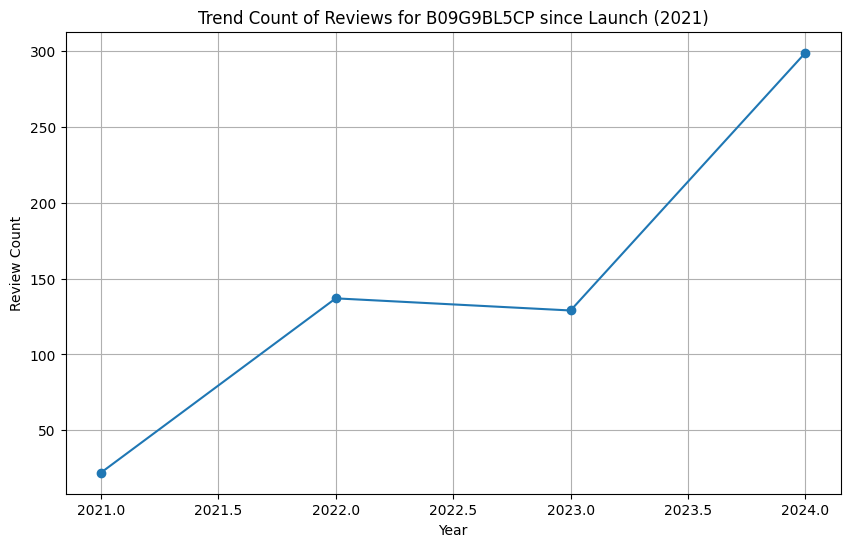

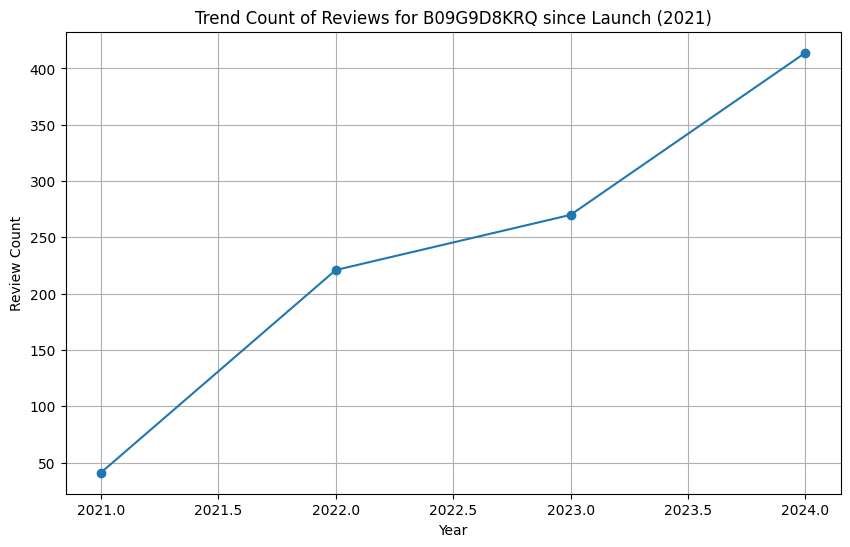

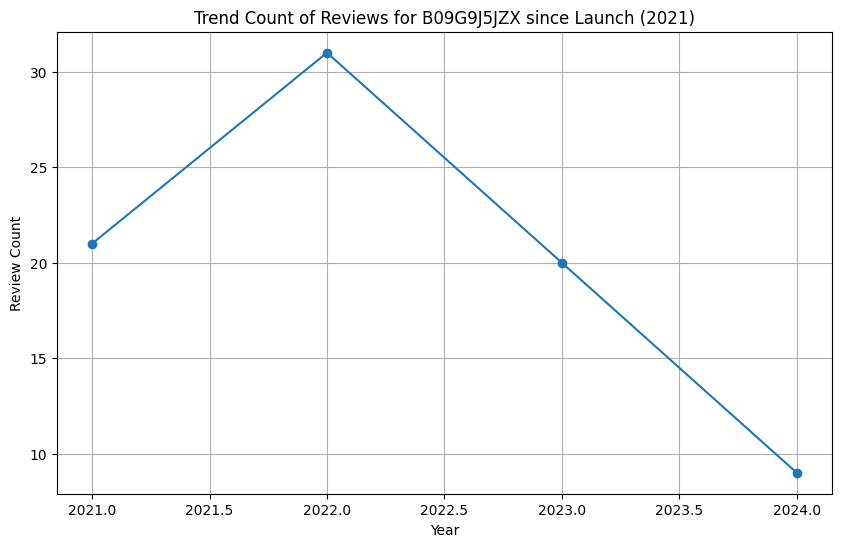

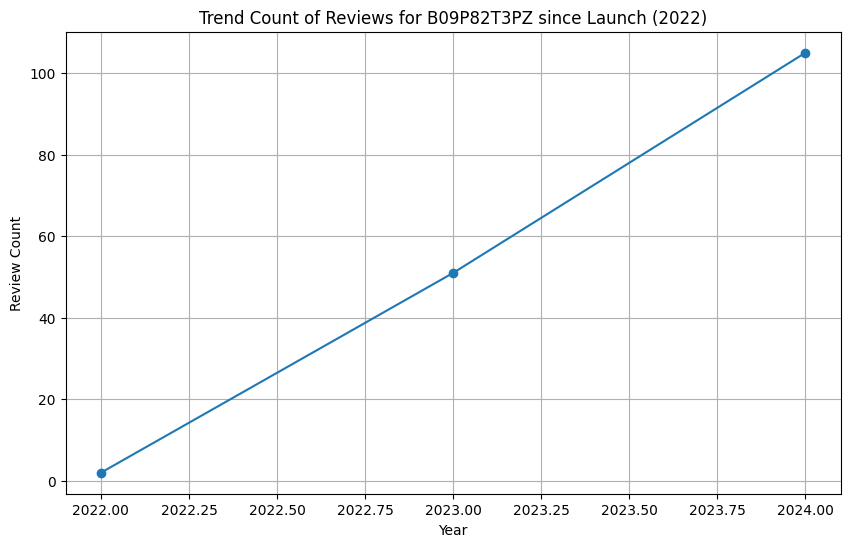

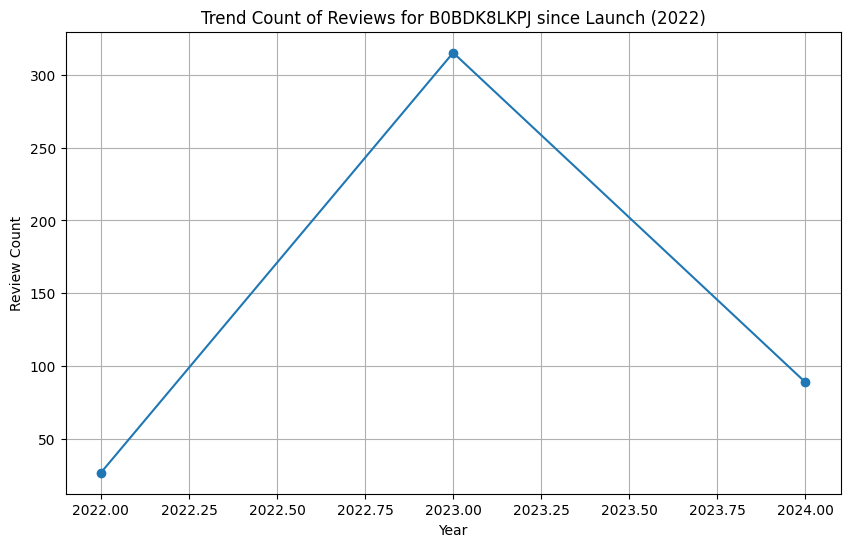

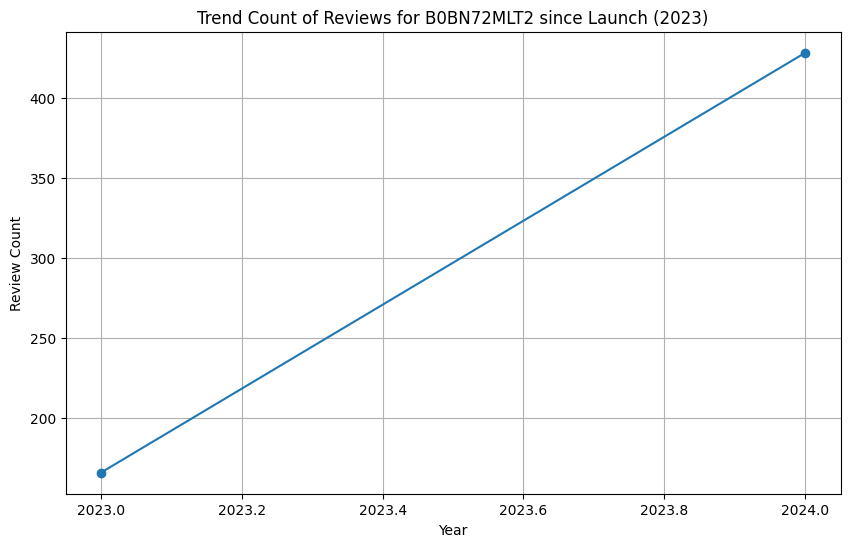

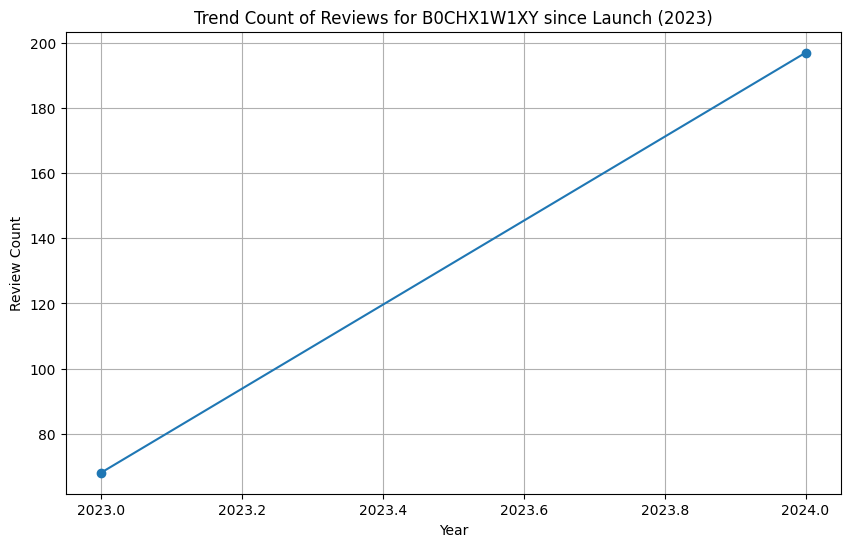

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Display file paths in the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset
review_ip = pd.read_csv(r'C:\Users\karri\Downloads\iphone.csv')
print(review_ip.head())
print(review_ip.columns)
print(review_ip.dtypes)

# Convert string to datetime
review_ip['date'] = pd.to_datetime(review_ip['date'], dayfirst=True)  # Assuming day-month-year format
print(review_ip.dtypes)

# Extract year and month
review_ip['year'] = review_ip['date'].dt.year
review_ip['month'] = review_ip['date'].dt.month
print(review_ip.head())

# Group by 'year' and calculate count of reviews
yearly_count = review_ip.groupby('year')['reviewTitle'].count().reset_index()

# Rename columns for clarity
yearly_count.columns = ['Year', 'Review Count']

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_count['Year'], yearly_count['Review Count'], marker='^')
plt.title('Year-wise Count of Reviews (Line Chart)')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.grid(True)
plt.show()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(yearly_count['Year'], yearly_count['Review Count'])
plt.title('Year-wise Count of Reviews (Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.grid(True)
plt.show()

# Unique product and variant counts
print(review_ip['productAsin'].nunique())
print(review_ip['variant'].nunique())
print(review_ip['variant'].unique())

# Group by 'productAsin' and calculate count of reviews
product_counts = review_ip.groupby('productAsin')['reviewTitle'].count().reset_index()

# Rename columns for clarity
product_counts.columns = ['Product Variant', 'Review Count']

# Sort the data by review count in descending order
product_counts = product_counts.sort_values(by='Review Count', ascending=False)

# Plot the top 10 product variants with the most reviews
top_products = product_counts.head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_products['Product Variant'], top_products['Review Count'])
plt.title('Top 10 Product Variants by Review Count')
plt.xlabel('Product Variant')
plt.ylabel('Review Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

# Calculate launch years
launch_years = review_ip.groupby('productAsin')['year'].min().reset_index()
launch_years.columns = ['productAsin', 'Launch Year']

# Merge the launch years with the original data
review_ip = pd.merge(review_ip, launch_years, on='productAsin')

# Group by 'productAsin' and 'year' to calculate the review count
review_counts = review_ip.groupby(['productAsin', 'year'])['reviewTitle'].count().reset_index()

# Pivot the data to create a separate column for each product variant
pivot_data = review_counts.pivot(index='year', columns='productAsin', values='reviewTitle')

# Create a separate plot for each product variant
for product in pivot_data.columns:
    product_data = pivot_data[product]
    launch_year = launch_years.loc[launch_years['productAsin'] == product, 'Launch Year'].values[0]
    
    # Plot the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(product_data.index, product_data.values, marker='o')
    plt.title(f'Trend Count of Reviews for {product} since Launch ({launch_year})')
    plt.xlabel('Year')
    plt.ylabel('Review Count')
    plt.grid(True)
    plt.show()

# Group by 'country' and 'year' to calculate the review count
review_counts = review_ip.groupby(['country', 'year'])['reviewTitle'].count().reset_index()

# Pivot the data to create a separate column for each country
pivot_data_country = review_counts.pivot(index='year', columns='country', values='reviewTitle')


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare the data for prediction
X = yearly_count[['Year']]
y = yearly_count['Review Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions for the next year
next_year = np.array([[yearly_count['Year'].max() + 1]])
predicted_review_count = model.predict(next_year)

print(f"Predicted review count for the year {next_year[0][0]}: {predicted_review_count[0]}")


Predicted review count for the year 2025: 1338.74


C:\Users\karri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [5]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.42249999999997045
R-squared: nan


C:\Users\karri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
